# Ejercicios

In [3]:
#Librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

1. Crear una función de diagnóstico en la cual dado un Dataframe y un conjunto de
variables numéricas a graficar, muestre los siguientes gráficos por variable:

- Histograma  
- Gráfico Q-Q  
- Diagrama de caja brazos

In [7]:
# Definir la función de diagnóstico 
def diagnostic_plots(df, variables):
    # Iterar sobre cada variable
    for var in variables:
        # Crear una figura con subplots
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Histograma con colores personalizados
        sns.histplot(df[var].dropna(), kde=True, ax=axes[0], color='skyblue', edgecolor='black')
        axes[0].set_title('Histograma')
        
        # Gráfico Q-Q
        stats.probplot(df[var].dropna(), dist="norm", plot=axes[1])
        axes[1].get_lines()[0].set_color('forestgreen')  # Ajustar el color de los puntos Q-Q
        axes[1].get_lines()[1].set_color('orange')  # Ajustar el color de la línea de referencia
        axes[1].set_title('Gráfico Q-Q')
        
        # Diagrama de caja y brazos con colores personalizados
        sns.boxplot(y=df[var], ax=axes[2], color='salmon')
        axes[2].set_title('Diagrama de caja y brazos')
        
        # Ajustar el espaciado entre subplots
        plt.tight_layout()
        
        # Mostrar la figura
        plt.show()

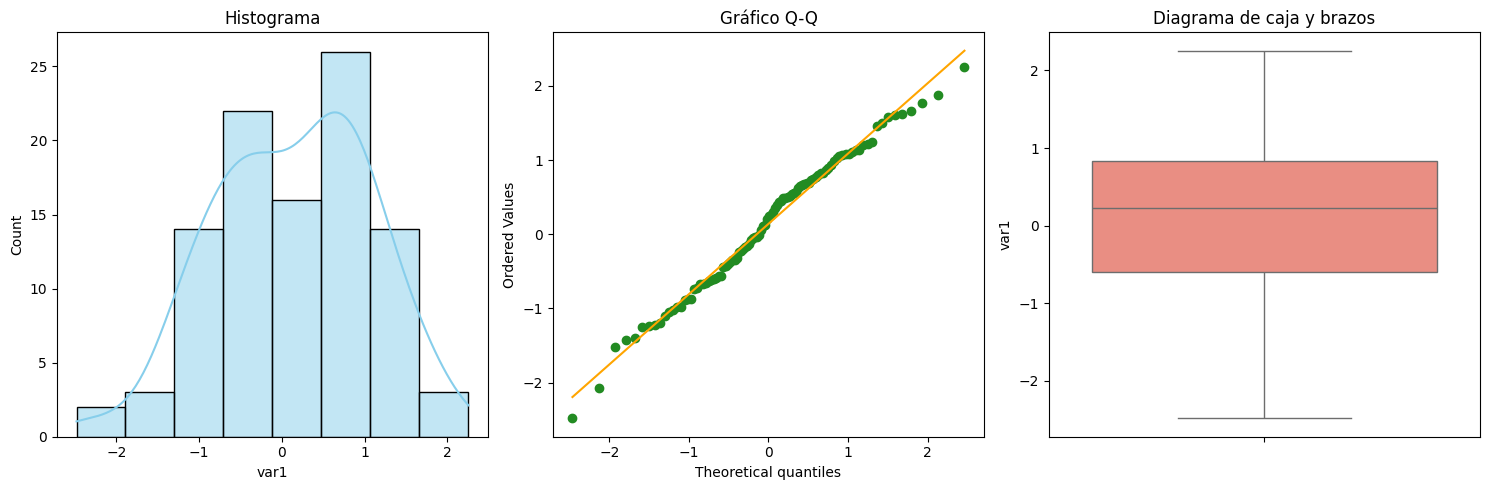

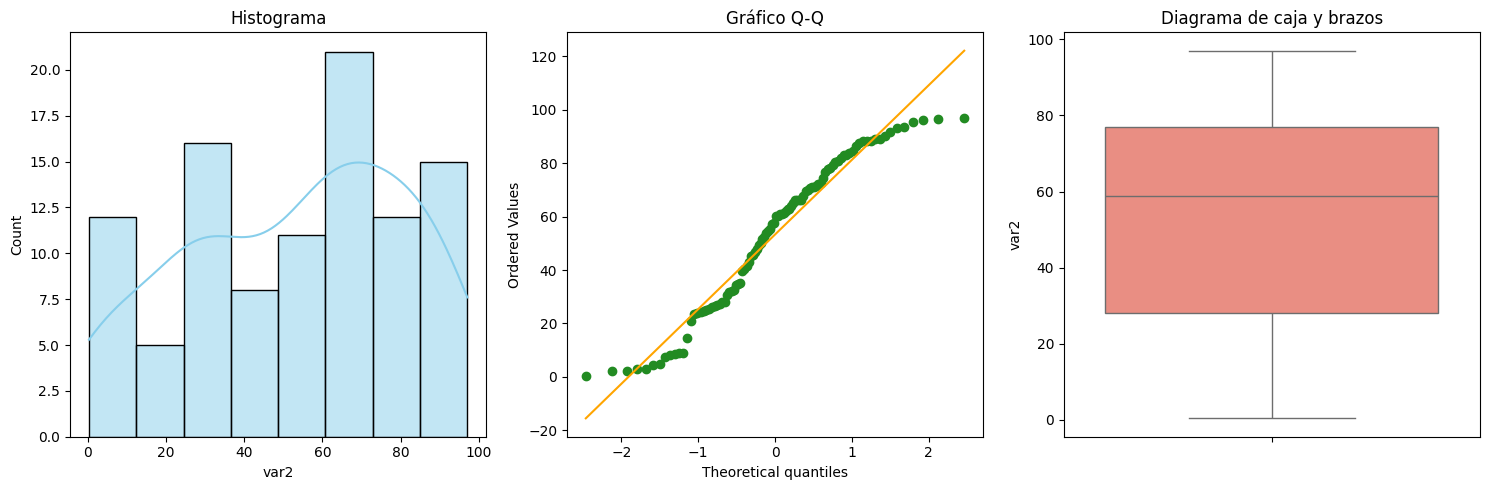

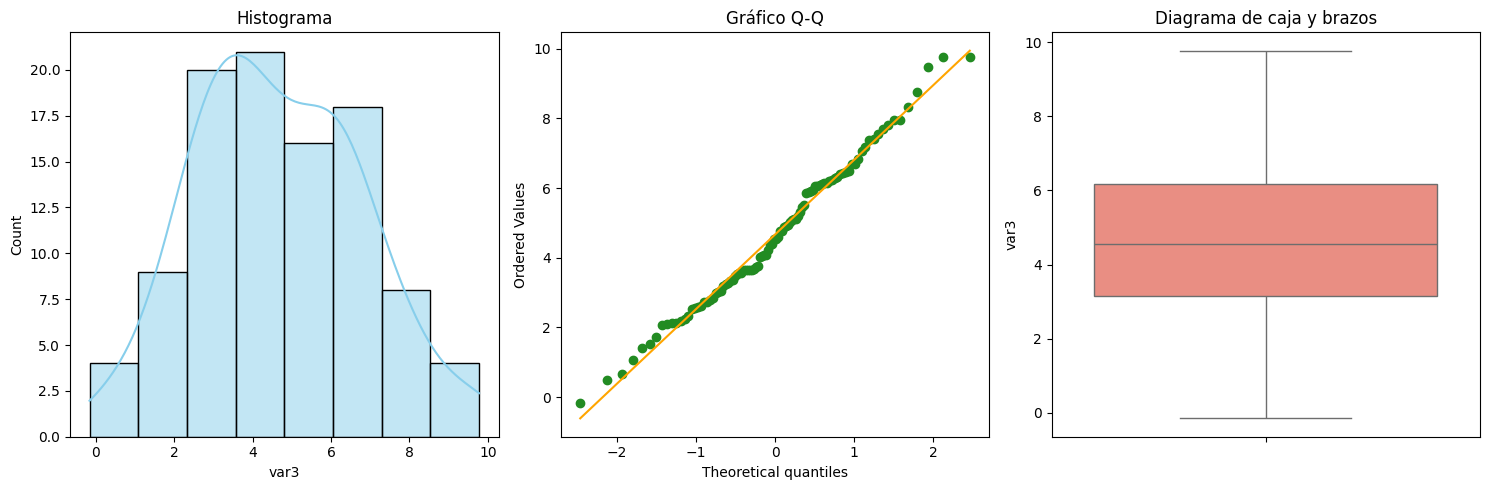

In [8]:
#DataFrame de ejemplo
data = {
    'var1': np.random.normal(loc=0, scale=1, size=100),  # Distribución normal media 0, desviación estándar 1
    'var2': np.random.uniform(low=0, high=100, size=100),  # Distribución uniforme entre 0 y 100
    'var3': np.random.normal(loc=5, scale=2, size=100),  # Otra distribución normal
}

df = pd.DataFrame(data)

diagnostic_plots(df, ['var1', 'var2', 'var3'])

2. Crear una función de diagnóstico en la cual dado un Dataframe supervisado y un
conjunto de variables categóricas a graficar, muestre los siguientes gráficos por
variable:

- Gráfico de barras coloreado por categoría
- Gráfico en mosaico

In [57]:
# Definir la función de diagnóstico para variables categóricas
def categorical_diagnostic_plots(df, categorical_vars):
    for var in categorical_vars:

        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Gráfico en mosaico (mosaic plot) en el primer subplot
        mosaic = df.groupby([var, 'target']).size().unstack()
        mosaic.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set1')
        axes[0].set_title(f'Gráfico en mosaico de {var}')
        
        # Gráfico de barras coloreado por categoría con sns.histplot en el segundo subplot
        sns.histplot(data=df, x=var, hue='target', multiple='fill', palette='Set2', ax=axes[1])
        axes[1].set_title(f'Gráfico de barras de {var} coloreado por categoría')
        
        # Ajustar el espaciado entre subplots
        plt.tight_layout()
        
        # Mostrar la figura
        plt.show()

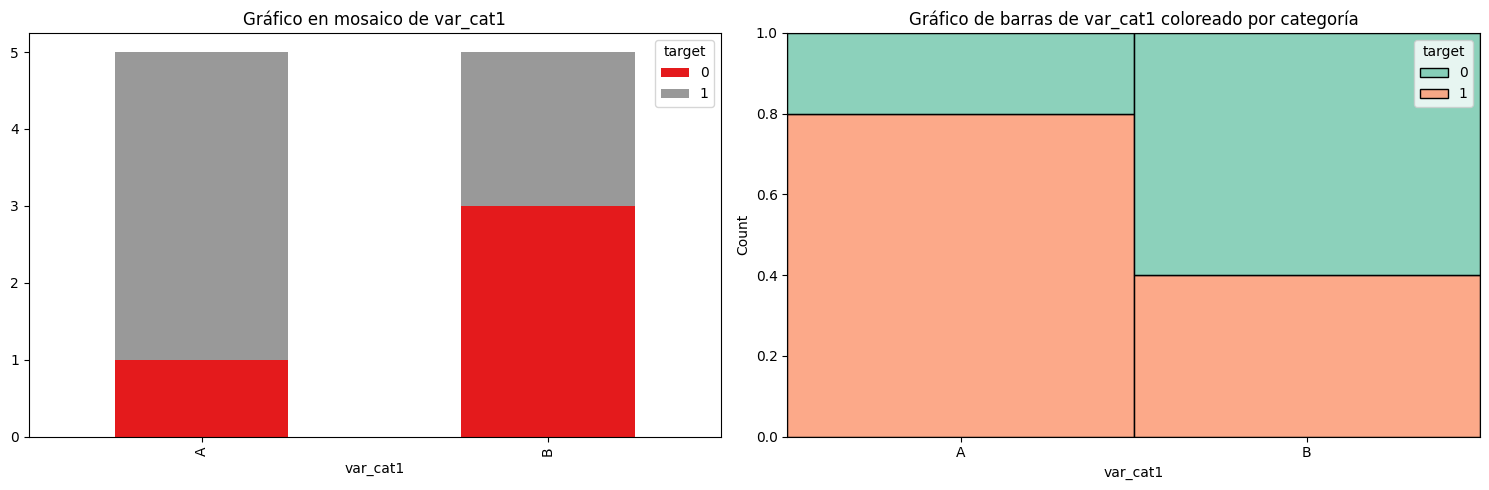

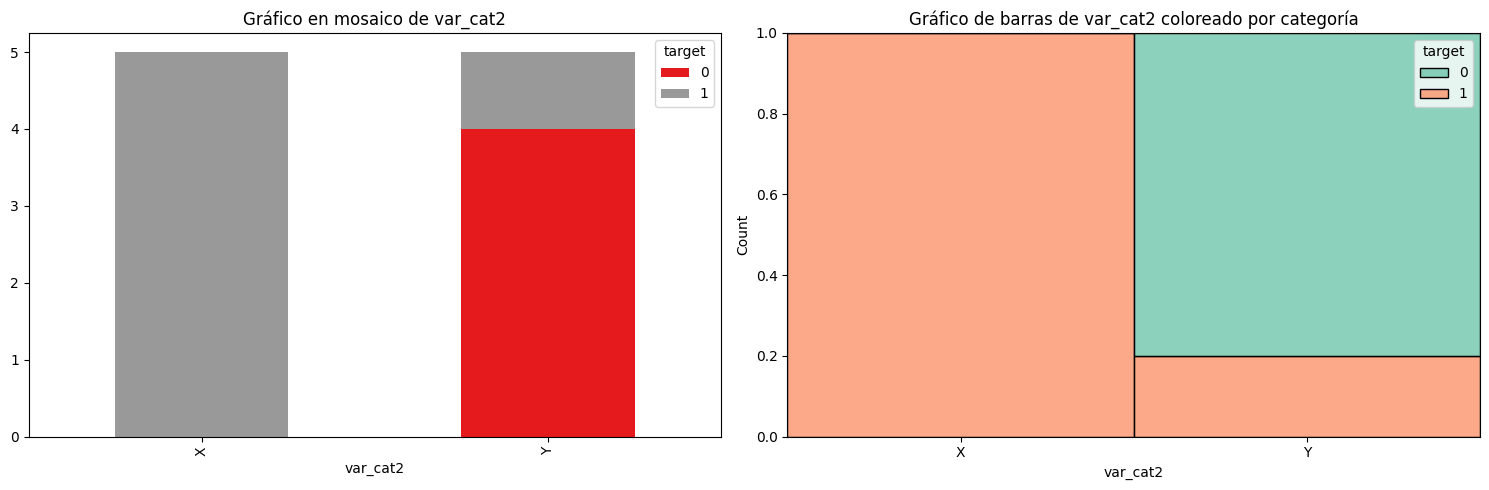

In [59]:
# DataFrame de ejemplo
data = {
    'var_cat1': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B'],
    'var_cat2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

# Función
categorical_diagnostic_plots(df, ['var_cat1', 'var_cat2'])